In [1]:
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

In [ ]:
#Azure機器學習功能基本語法

In [6]:
subscription_key = 'e400e3bf0a09443d880e5bf0e1895eb8'#資源key1
vision_base_url = 'https://southeastasia.api.cognitive.microsoft.com/vision/v2.0/'#資源端點
ocr_url = vision_base_url + "ocr"#功能為OCR
imgur_url = 'https://i.imgur.com/ptMvd6w.png'#遠端圖片(要辨識的圖片)
headers = {'Ocp-Apim-Subscription-Key':subscription_key}
params = {'language':'unk','detectOrientation':'true'}#'language':'unk'設定自動偵測語言種類，'detectOrientation':'true'設定自動偵測文字的方向
data = {'url':imgur_url}
response = requests.post(ocr_url, headers = headers ,params = params, json = data)
analysis = response.json()
print(analysis)
#'language': 'zh-Hant' 繁體中文 ，'orientation': 'Up'文字方向向上 ，boundingBox': '569,129,388,132'座標資料，'words':文字結果

{'language': 'zh-Hant', 'textAngle': 0.0, 'orientation': 'Up', 'regions': [{'boundingBox': '569,122,2008,167', 'lines': [{'boundingBox': '569,122,2008,167', 'words': [{'boundingBox': '569,129,388,132', 'text': '2018'}, {'boundingBox': '973,122,162,167', 'text': '年'}, {'boundingBox': '1152,122,165,165', 'text': '南'}, {'boundingBox': '1332,122,165,165', 'text': '韓'}, {'boundingBox': '1509,122,169,165', 'text': '代'}, {'boundingBox': '1691,123,167,162', 'text': '表'}, {'boundingBox': '1872,122,166,165', 'text': '成'}, {'boundingBox': '2051,122,166,166', 'text': '語'}, {'boundingBox': '2231,122,166,166', 'text': '排'}, {'boundingBox': '2412,123,165,164', 'text': '行'}]}]}, {'boundingBox': '906,400,159,1112', 'lines': [{'boundingBox': '906,400,138,112', 'words': [{'boundingBox': '906,400,80,112', 'text': '#'}, {'boundingBox': '1004,402,40,108', 'text': '1'}]}, {'boundingBox': '906,650,158,112', 'words': [{'boundingBox': '906,650,80,112', 'text': '#'}, {'boundingBox': '992,652,72,108', 'text': '2'

In [ ]:
#line_infos串列儲存所有文字的座標

In [8]:
line_infos = []
for region in analysis['regions']:
    line_infos.append(region['lines'])
line_infos


[[{'boundingBox': '569,122,2008,167',
   'words': [{'boundingBox': '569,129,388,132', 'text': '2018'},
    {'boundingBox': '973,122,162,167', 'text': '年'},
    {'boundingBox': '1152,122,165,165', 'text': '南'},
    {'boundingBox': '1332,122,165,165', 'text': '韓'},
    {'boundingBox': '1509,122,169,165', 'text': '代'},
    {'boundingBox': '1691,123,167,162', 'text': '表'},
    {'boundingBox': '1872,122,166,165', 'text': '成'},
    {'boundingBox': '2051,122,166,166', 'text': '語'},
    {'boundingBox': '2231,122,166,166', 'text': '排'},
    {'boundingBox': '2412,123,165,164', 'text': '行'}]}],
 [{'boundingBox': '906,400,138,112',
   'words': [{'boundingBox': '906,400,80,112', 'text': '#'},
    {'boundingBox': '1004,402,40,108', 'text': '1'}]},
  {'boundingBox': '906,650,158,112',
   'words': [{'boundingBox': '906,650,80,112', 'text': '#'},
    {'boundingBox': '992,652,72,108', 'text': '2'}]},
  {'boundingBox': '906,901,159,111',
   'words': [{'boundingBox': '906,901,80,111', 'text': '#'},
    {'

In [25]:
word_infos = []
for line in line_infos:
    #print(line)
    #print('==================')
    for word_metedata in line:
        #print(word_metedata)
        #print('----------------')
        for word_info in word_metedata['words']:
            #print(word_info)
            word_infos.append(word_info)
word_infos

[{'boundingBox': '569,129,388,132', 'text': '2018'},
 {'boundingBox': '973,122,162,167', 'text': '年'},
 {'boundingBox': '1152,122,165,165', 'text': '南'},
 {'boundingBox': '1332,122,165,165', 'text': '韓'},
 {'boundingBox': '1509,122,169,165', 'text': '代'},
 {'boundingBox': '1691,123,167,162', 'text': '表'},
 {'boundingBox': '1872,122,166,165', 'text': '成'},
 {'boundingBox': '2051,122,166,166', 'text': '語'},
 {'boundingBox': '2231,122,166,166', 'text': '排'},
 {'boundingBox': '2412,123,165,164', 'text': '行'},
 {'boundingBox': '906,400,80,112', 'text': '#'},
 {'boundingBox': '1004,402,40,108', 'text': '1'},
 {'boundingBox': '906,650,80,112', 'text': '#'},
 {'boundingBox': '992,652,72,108', 'text': '2'},
 {'boundingBox': '906,901,80,111', 'text': '#'},
 {'boundingBox': '994,902,71,110', 'text': '3'},
 {'boundingBox': '906,1150,80,112', 'text': '#'},
 {'boundingBox': '990,1152,74,108', 'text': '4'},
 {'boundingBox': '906,1400,80,112', 'text': '#'},
 {'boundingBox': '994,1404,71,108', 'text': 

In [ ]:
#框選所有文字，根據word_infos串列資料逐一將文字框選起來

[569, 129, 388, 132]
[973, 122, 162, 167]
[1152, 122, 165, 165]
[1332, 122, 165, 165]
[1509, 122, 169, 165]
[1691, 123, 167, 162]
[1872, 122, 166, 165]
[2051, 122, 166, 166]
[2231, 122, 166, 166]
[2412, 123, 165, 164]
[906, 400, 80, 112]
[1004, 402, 40, 108]
[906, 650, 80, 112]
[992, 652, 72, 108]
[906, 901, 80, 111]
[994, 902, 71, 110]
[906, 1150, 80, 112]
[990, 1152, 74, 108]
[906, 1400, 80, 112]
[994, 1404, 71, 108]
[1288, 409, 114, 110]
[1410, 409, 111, 107]
[1531, 409, 110, 109]
[1651, 409, 110, 110]
[1292, 659, 109, 109]
[1409, 658, 112, 112]
[1531, 659, 110, 110]
[1651, 658, 109, 111]
[1291, 909, 106, 111]
[1409, 909, 111, 109]
[1531, 909, 110, 109]
[1651, 909, 110, 109]
[1289, 1158, 112, 112]
[1410, 1158, 110, 112]
[1530, 1159, 111, 110]
[1651, 1159, 109, 109]
[1291, 1409, 110, 102]
[1410, 1408, 111, 111]
[1531, 1408, 110, 110]
[1654, 1408, 107, 110]


(-0.5, 2879.5, 1619.5, -0.5)

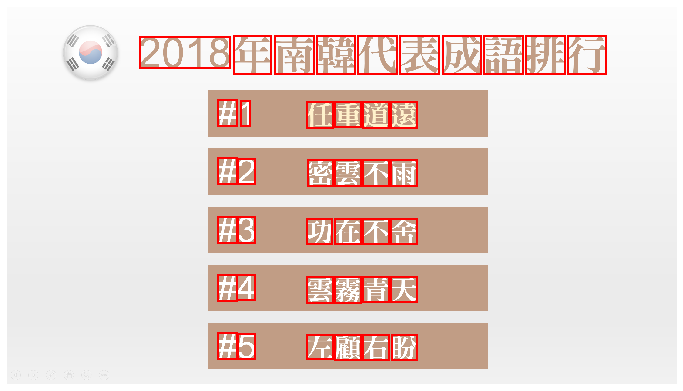

In [30]:
plt.figure(figsize = (12,12))
image = Image.open(BytesIO(requests.get(imgur_url).content))
ax = plt.imshow(image,alpha = 0.5)
for word in word_infos:
    bbox = [int(num) for num in word['boundingBox'].split(",")]
#     text = word['text']
#     print(text)
    print(bbox)
    origin = (bbox[0],bbox[1])
    patch = Rectangle(origin,bbox[2],bbox[3],fill = False,linewidth = 2,color = 'r')
    ax.axes.add_patch(patch)
plt.axis('off')#隱藏坐標軸